Setup and Load Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Import Successful") 


Import Successful


Load Dataset

In [10]:
df = pd.read_csv(r'C:\Users\SATYAM\Downloads\country_wise_latest.csv')

In [12]:
print(df.head())
print(df.info())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

Data Cleaning & Handling Missing Values

In [15]:
# Check missing values
print(df.isnull().sum())

# Fill missing numeric data with 0 
df.fillna(0, inplace=True)


Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


 Basic Statistical Summary

In [18]:
print(df.describe())


          Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
std     120.037173    4197.719635      

Visualization: Top 10 Countries by Confirmed Cases

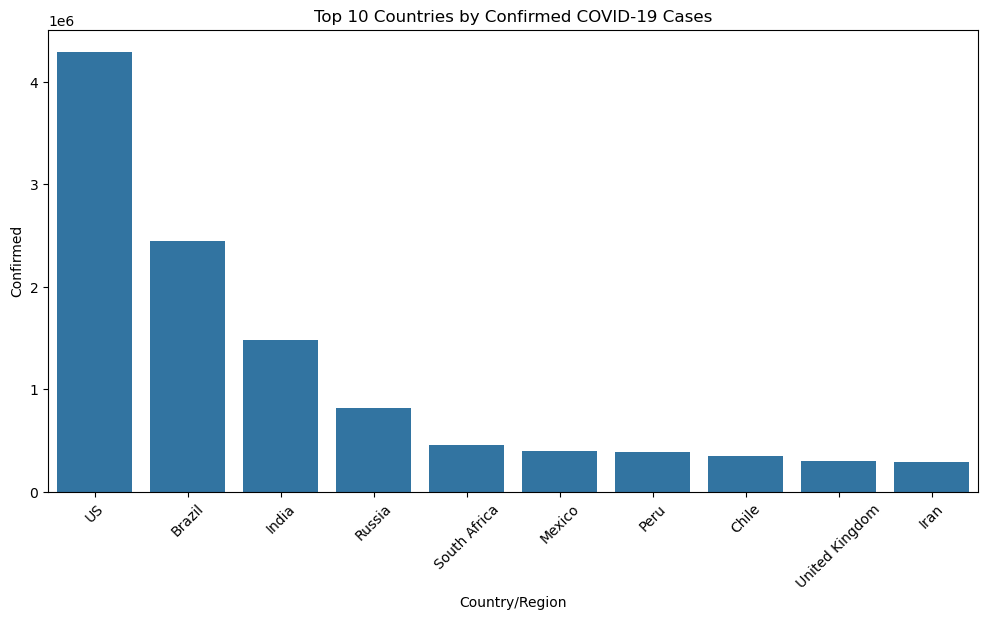

In [21]:
top_confirmed = df.sort_values(by='Confirmed', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Country/Region', y='Confirmed', data=top_confirmed)
plt.title('Top 10 Countries by Confirmed COVID-19 Cases')
plt.xticks(rotation=45)
plt.show()


New Cases and Deaths Analysis

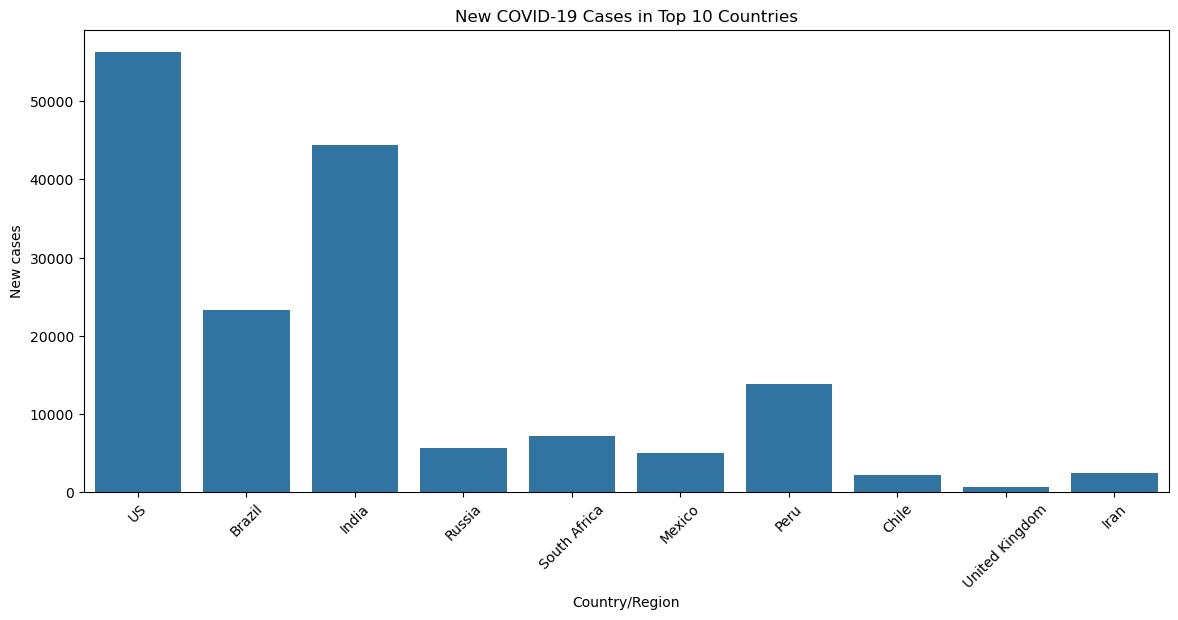

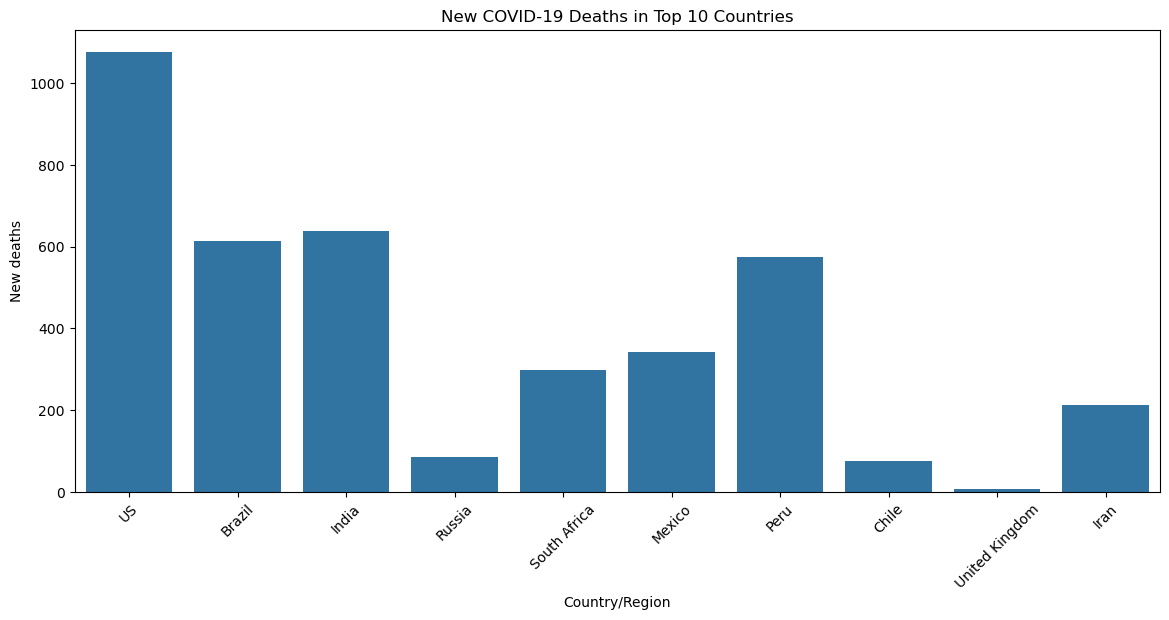

In [24]:
plt.figure(figsize=(14,6))
sns.barplot(x='Country/Region', y='New cases', data=top_confirmed)
plt.title('New COVID-19 Cases in Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x='Country/Region', y='New deaths', data=top_confirmed)
plt.title('New COVID-19 Deaths in Top 10 Countries')
plt.xticks(rotation=45)
plt.show()


Death Rate and Recovery Rate Analysis

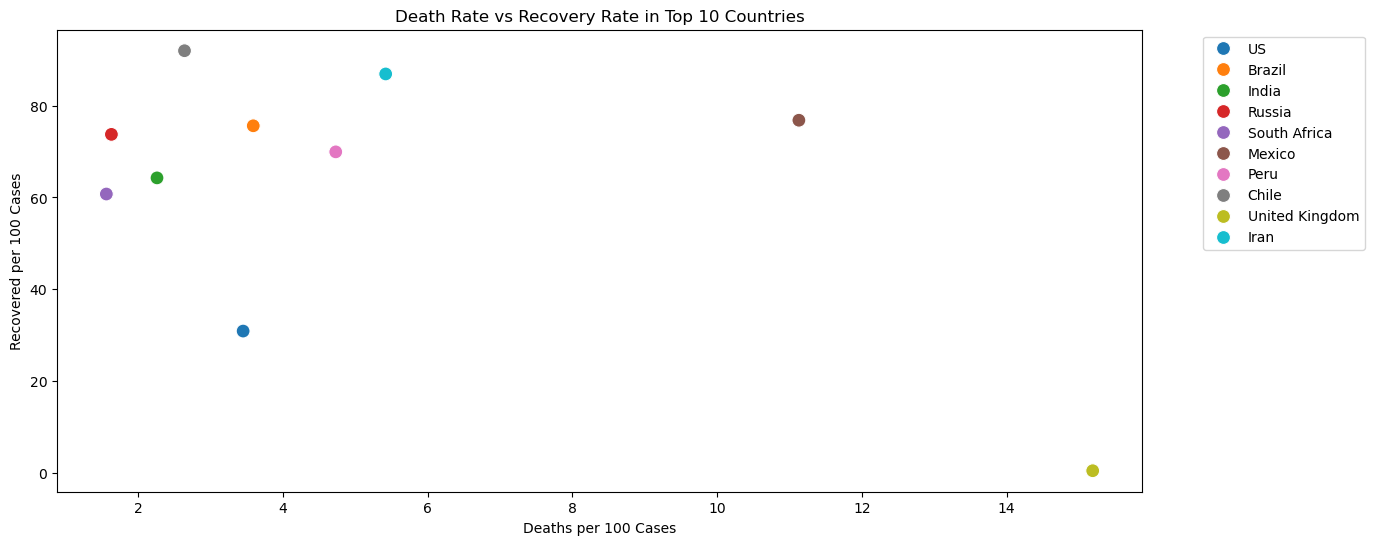

In [27]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='Deaths / 100 Cases', y='Recovered / 100 Cases', data=top_confirmed, hue='Country/Region', s=100)
plt.title('Death Rate vs Recovery Rate in Top 10 Countries')
plt.xlabel('Deaths per 100 Cases')
plt.ylabel('Recovered per 100 Cases')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Correlation Heatmap for Key Metrics

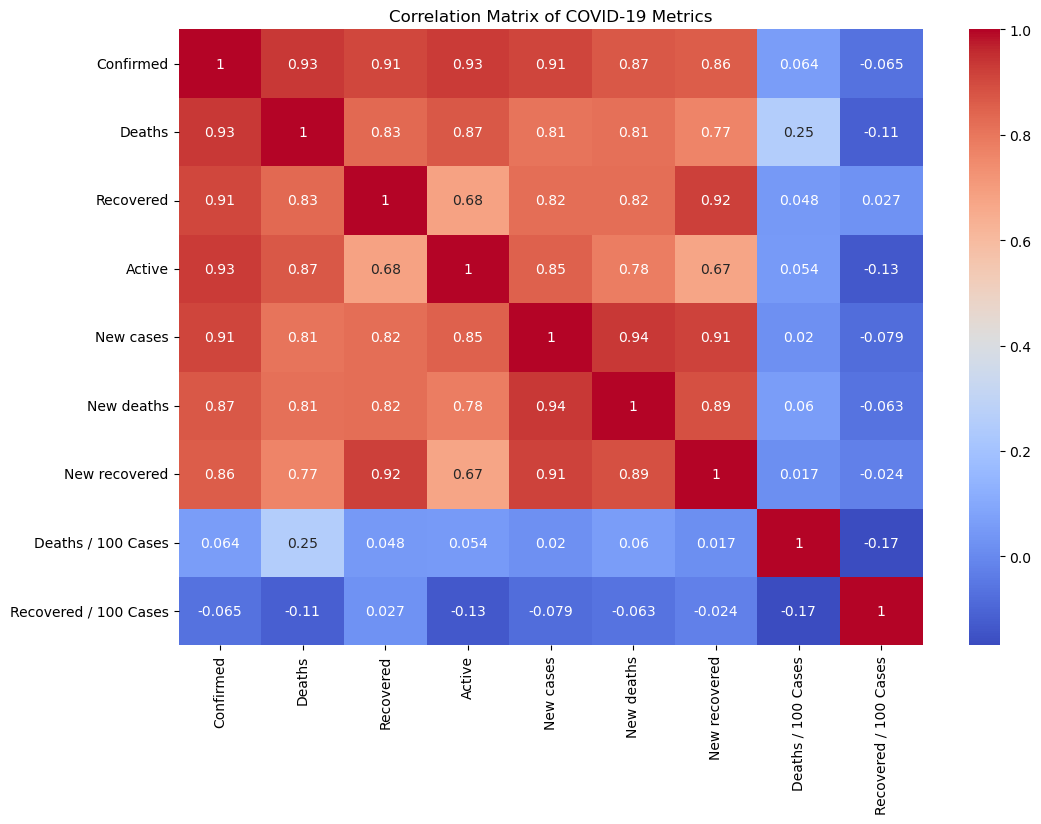

In [30]:
correlation_columns = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases']

plt.figure(figsize=(12,8))
sns.heatmap(df[correlation_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()


Feature Engineering — Calculate Case Fatality Rate (CFR) and Recovery Rate

In [33]:
df['CFR (%)'] = (df['Deaths'] / df['Confirmed']) * 100
df['Recovery Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100

# Show for top countries
print(df[['Country/Region', 'CFR (%)', 'Recovery Rate (%)']].sort_values(by='CFR (%)', ascending=False).head(10))


     Country/Region    CFR (%)  Recovery Rate (%)
184           Yemen  28.562980          49.260792
177  United Kingdom  15.194824           0.476288
16          Belgium  14.785934          26.272054
85            Italy  14.256596          80.635115
61           France  13.710790          36.855577
77          Hungary  13.399281          74.842626
120     Netherlands  11.532773           0.353846
111          Mexico  11.131030          76.818824
157           Spain  10.436787          55.199856
183  Western Sahara  10.000000          80.000000


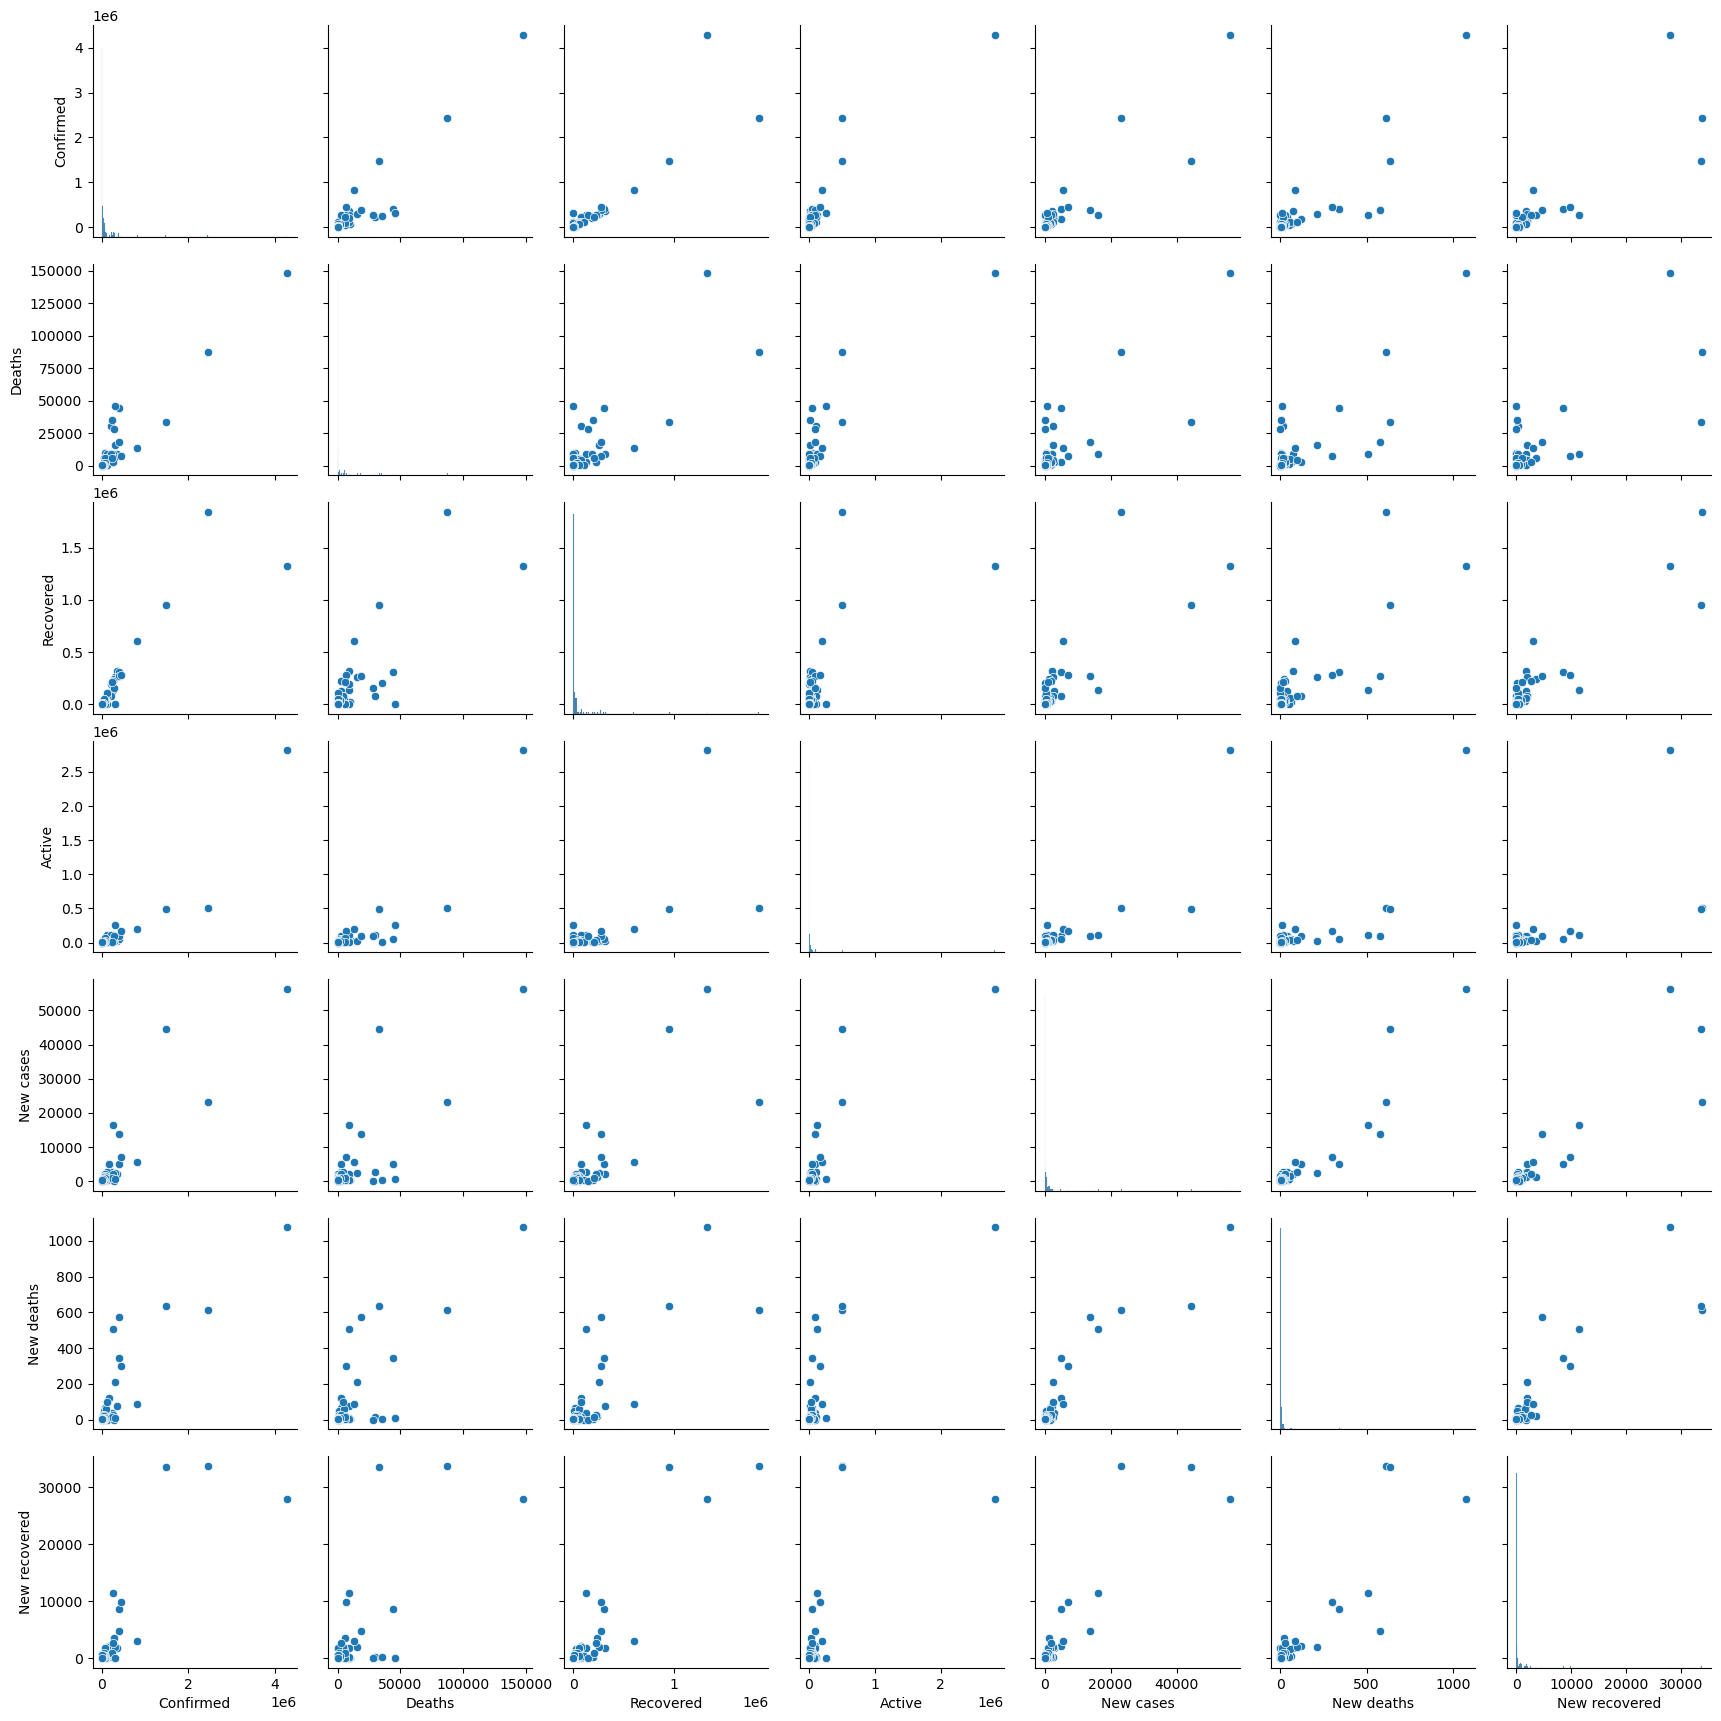

In [41]:
sns.pairplot(df[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']])
plt.show()


In [46]:
india_data = df[df['Country/Region'] == 'India']


Display Basic Stats for India

In [49]:
print(india_data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']].describe())


       Confirmed   Deaths  Recovered    Active  New cases  New deaths  \
count        1.0      1.0        1.0       1.0        1.0         1.0   
mean   1480073.0  33408.0   951166.0  495499.0    44457.0       637.0   
std          NaN      NaN        NaN       NaN        NaN         NaN   
min    1480073.0  33408.0   951166.0  495499.0    44457.0       637.0   
25%    1480073.0  33408.0   951166.0  495499.0    44457.0       637.0   
50%    1480073.0  33408.0   951166.0  495499.0    44457.0       637.0   
75%    1480073.0  33408.0   951166.0  495499.0    44457.0       637.0   
max    1480073.0  33408.0   951166.0  495499.0    44457.0       637.0   

       New recovered  
count            1.0  
mean         33598.0  
std              NaN  
min          33598.0  
25%          33598.0  
50%          33598.0  
75%          33598.0  
max          33598.0  


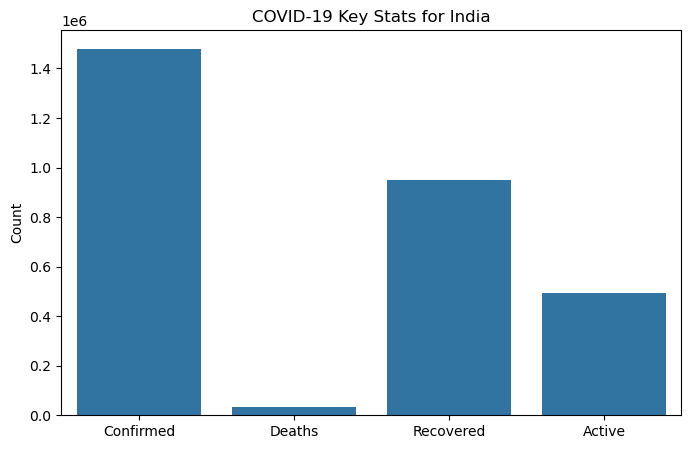

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

stats = ['Confirmed', 'Deaths', 'Recovered', 'Active']
values = india_data[stats].sum()

plt.figure(figsize=(8,5))
sns.barplot(x=stats, y=values.values)
plt.title('COVID-19 Key Stats for India')
plt.ylabel('Count')
plt.show()


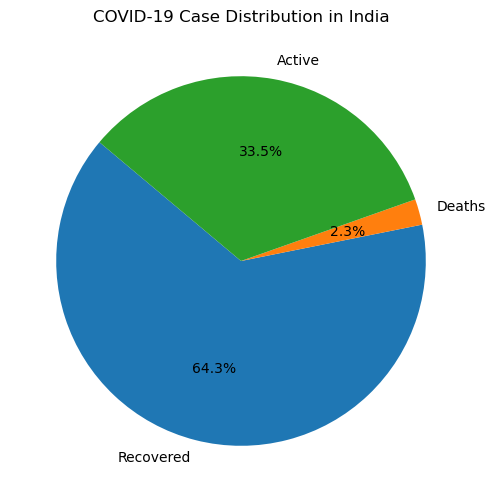

In [53]:
labels = ['Recovered', 'Deaths', 'Active']
sizes = [india_data['Recovered'].sum(), india_data['Deaths'].sum(), india_data['Active'].sum()]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('COVID-19 Case Distribution in India')
plt.show()


In [55]:
death_rate = (india_data['Deaths'].sum() / india_data['Confirmed'].sum()) * 100
print(f"Death Rate in India: {death_rate:.2f}%")


Death Rate in India: 2.26%


In [57]:
recovery_rate = (india_data['Recovered'].sum() / india_data['Confirmed'].sum()) * 100
print(f"Recovery Rate in India: {recovery_rate:.2f}%")


Recovery Rate in India: 64.26%


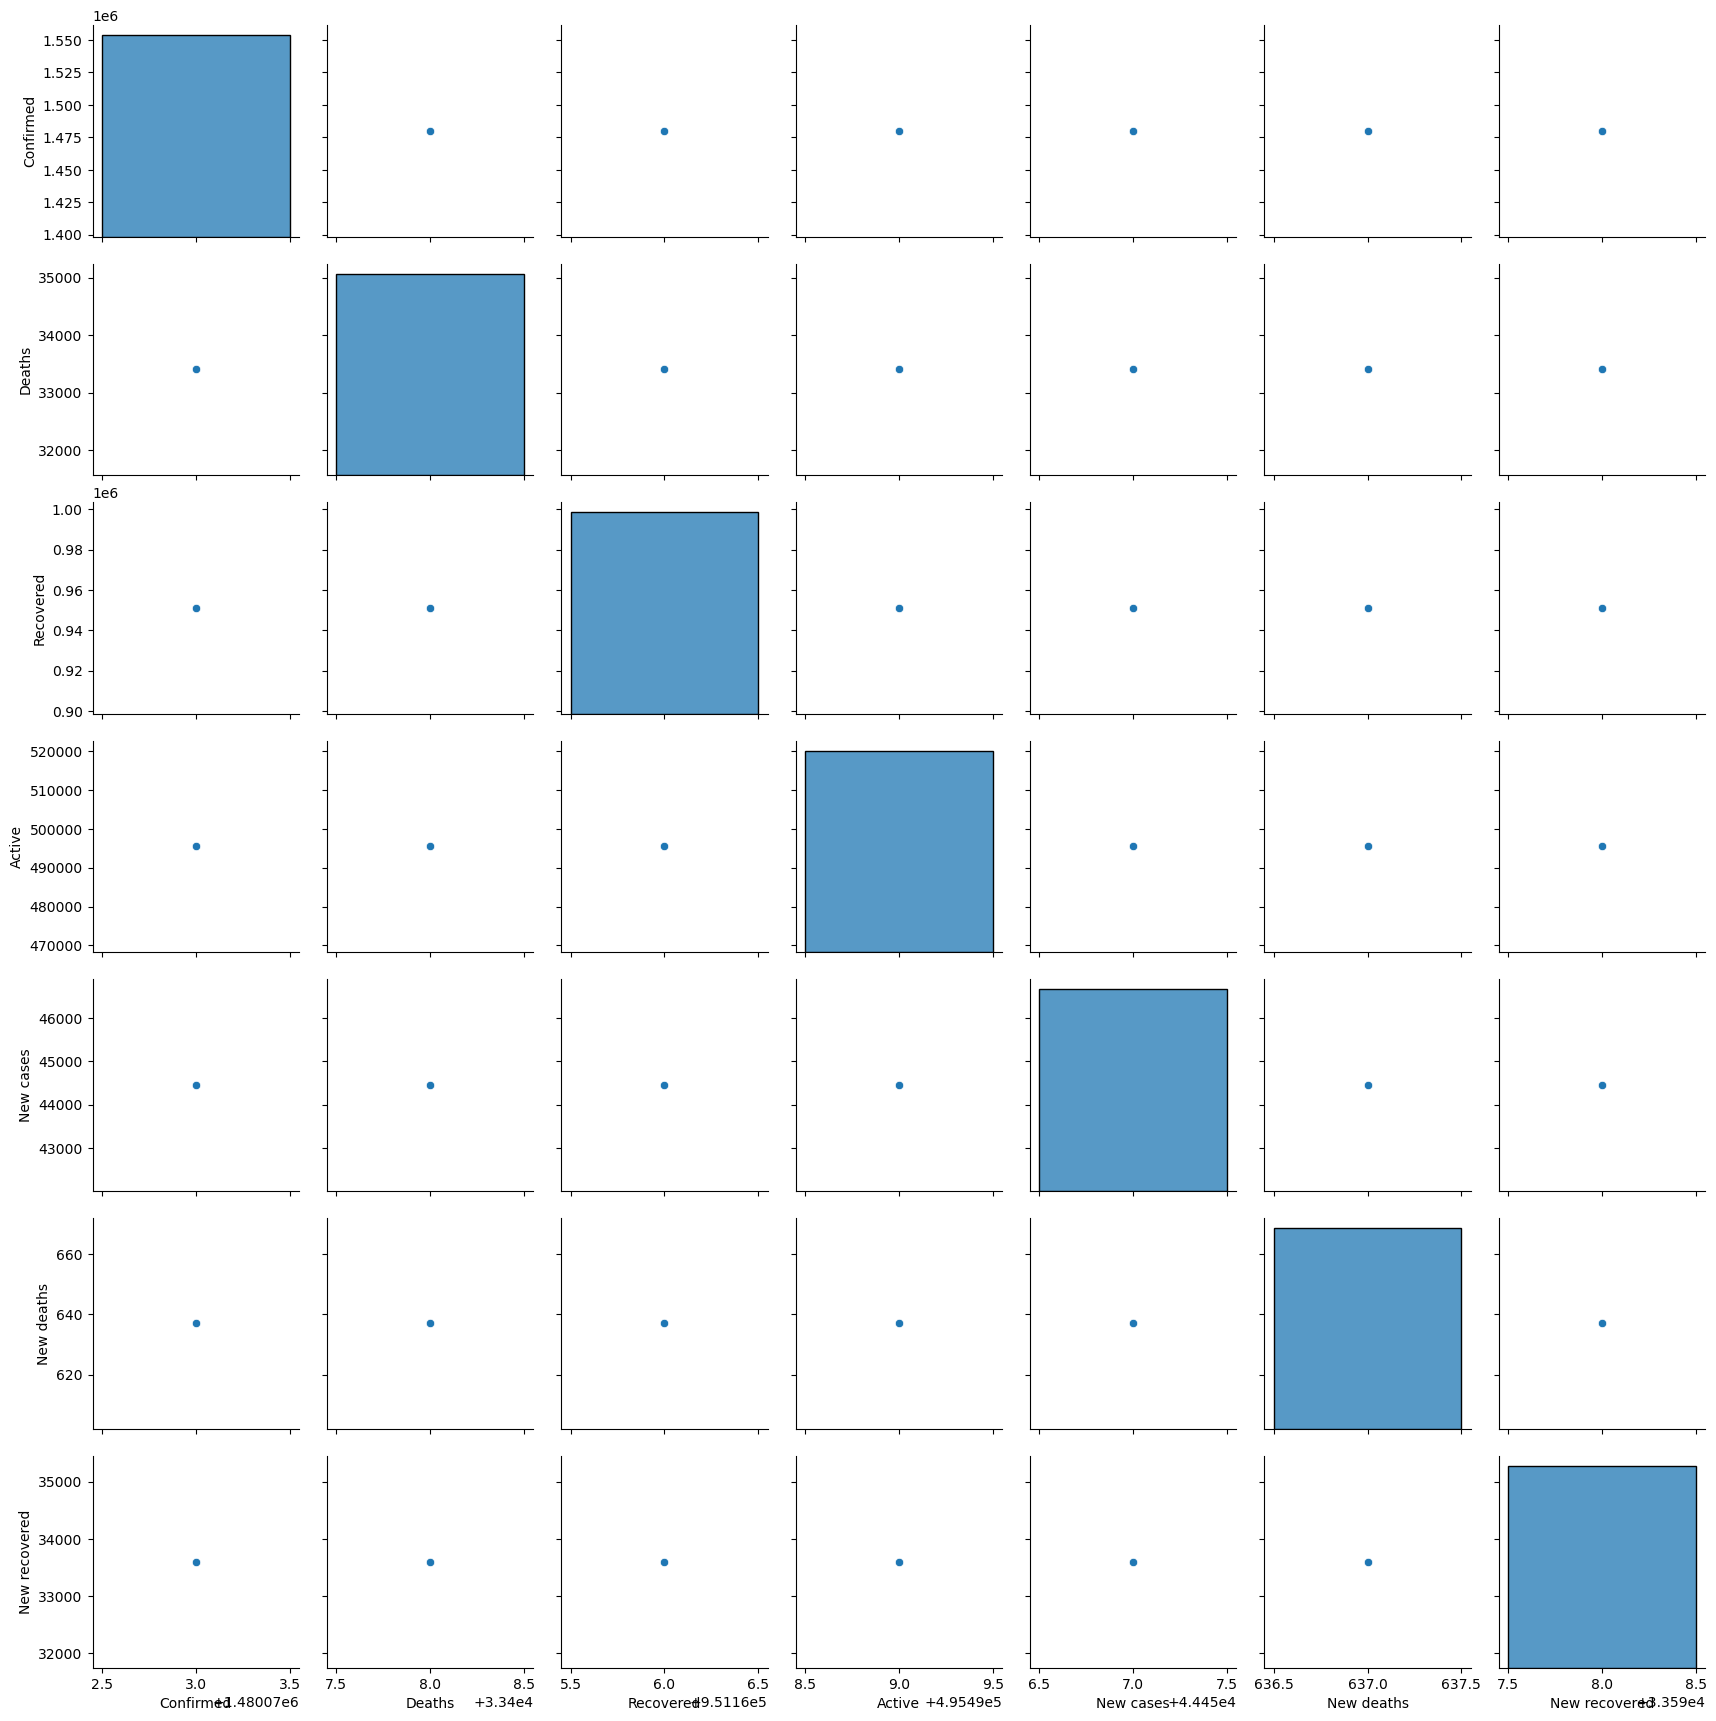

In [59]:
sns.pairplot(india_data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']].dropna())
plt.show()
